Fitting 5 folds for each of 81 candidates, totalling 405 fits
Melhores hiperparâmetros: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


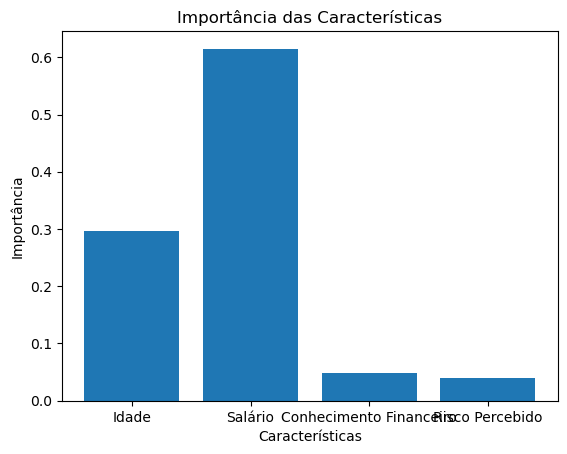

Acurácia do modelo melhorado: 0.9997007779772591

Relatório de classificação:
              precision    recall  f1-score   support

   agressivo       1.00      1.00      1.00      2185
 conservador       1.00      1.00      1.00      2269
    moderado       1.00      1.00      1.00      2230

    accuracy                           1.00      6684
   macro avg       1.00      1.00      1.00      6684
weighted avg       1.00      1.00      1.00      6684

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, min_samples

In [3]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Simulação de dados de exemplo
np.random.seed(0)

# Características dos clientes (fictícias)
idades = np.random.randint(20, 70, size=5000)
salarios = np.random.randint(2000, 10000, size=5000)
conhecimento_financeiro = np.random.randint(0, 3, size=5000)  # 0: baixo, 1: médio, 2: alto
risco_percebido = np.random.randint(0, 3, size=5000)  # 0: baixo, 1: médio, 2: alto

# Simulação do perfil de investimento dos clientes
perfil_investimento = np.random.choice(['conservador', 'moderado', 'agressivo'], size=5000)

# Duplicando as instâncias com conhecimento financeiro alto
indices_conhecimento_alto = np.where(conhecimento_financeiro == 2)[0]
idades = np.concatenate((idades, idades[indices_conhecimento_alto]))
salarios = np.concatenate((salarios, salarios[indices_conhecimento_alto]))
conhecimento_financeiro = np.concatenate((conhecimento_financeiro, conhecimento_financeiro[indices_conhecimento_alto]))
risco_percebido = np.concatenate((risco_percebido, risco_percebido[indices_conhecimento_alto]))
perfil_investimento = np.concatenate((perfil_investimento, perfil_investimento[indices_conhecimento_alto]))

# Concatenando as características dos clientes
X = np.column_stack((idades, salarios, conhecimento_financeiro, risco_percebido))

# Codificando as variáveis categóricas do perfil de investimento
le = LabelEncoder()
y = le.fit_transform(perfil_investimento)

# Validação cruzada estratificada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Ajuste de hiperparâmetros usando GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=skf, n_jobs=-1, verbose=2)
grid_search.fit(X, y)

# Melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Modelo com melhores hiperparâmetros
best_model = grid_search.best_estimator_

# Visualização da importância das características
importances = best_model.feature_importances_
features = ['Idade', 'Salário', 'Conhecimento Financeiro', 'Risco Percebido']
plt.bar(features, importances)
plt.xlabel('Características')
plt.ylabel('Importância')
plt.title('Importância das Características')
plt.show()

# Previsões para o conjunto de teste
y_pred = best_model.predict(X)

# Avaliação do modelo
accuracy = accuracy_score(y, y_pred)
print("Acurácia do modelo melhorado:", accuracy)
print("\nRelatório de classificação:")
print(classification_report(y, y_pred, target_names=le.classes_))